### Import Library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Data Understanding

##### Gathering Data

In [2]:
df = pd.read_csv("student_habits_performance.csv")

In [3]:
df.sample(5)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
959,S1959,23,Female,3.2,4.5,0.7,No,95.1,5.9,Fair,2,Master,Good,1,No,45.7
236,S1236,22,Male,1.5,1.4,2.4,No,80.9,6.0,Good,3,High School,Good,5,No,46.2
894,S1894,20,Male,1.5,4.6,0.7,Yes,82.6,7.0,Good,1,Bachelor,Good,4,Yes,45.4
92,S1092,18,Male,0.5,0.8,2.5,Yes,97.9,4.1,Poor,4,High School,Good,3,No,43.9
482,S1482,21,Male,3.4,1.5,0.7,No,79.3,7.1,Fair,1,NaN,Poor,1,No,67.0


##### Assessing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [5]:
df.isna().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

Dataset menunjukan ada 91 nilai null pada kolom `parental_education_level`.

In [ ]:
df[df.isna().any(axis=1)]

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
10,S1010,19,Female,4.6,3.7,0.8,No,77.6,5.8,Fair,1,NaN,Good,3,No,63.3
33,S1033,18,Female,4.0,0.9,1.1,No,99.5,5.8,Poor,2,NaN,Average,5,No,70.7
47,S1047,23,Female,2.5,2.9,2.7,No,83.5,7.0,Good,4,NaN,Good,8,Yes,59.7
74,S1074,21,Female,2.3,1.0,0.4,No,100.0,6.4,Fair,6,NaN,Good,1,No,66.9
93,S1093,22,Male,4.1,2.5,3.0,No,85.1,5.8,Good,4,NaN,Good,5,No,70.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,S1921,23,Female,4.4,2.7,1.0,No,79.8,6.1,Fair,6,NaN,Average,3,No,85.4
925,S1925,19,Other,1.7,2.9,1.6,Yes,97.3,8.7,Good,1,NaN,Good,7,No,53.6
939,S1939,18,Female,4.7,3.2,1.9,No,75.2,5.4,Good,3,NaN,Good,6,No,71.0
945,S1945,23,Male,6.0,2.9,2.1,Yes,98.9,6.4,Poor,0,NaN,Average,7,No,100.0


In [7]:
df["parental_education_level"].describe()

count             909
unique              3
top       High School
freq              392
Name: parental_education_level, dtype: object

##### Cleaning Data

Menghapus kolom yang tidak perlu di dataset yaitu `student_id` dan mengisi missing value di kolom `parental_education_level` dengan modus dari kolom tersebut (High School)

In [8]:
# hapus kolom student_id
df.drop(columns=["student_id"], inplace=True)

In [9]:
most_frequent = df['parental_education_level'].mode()[0]
df['parental_education_level'] = df['parental_education_level'].fillna(most_frequent)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   gender                         1000 non-null   object 
 2   study_hours_per_day            1000 non-null   float64
 3   social_media_hours             1000 non-null   float64
 4   netflix_hours                  1000 non-null   float64
 5   part_time_job                  1000 non-null   object 
 6   attendance_percentage          1000 non-null   float64
 7   sleep_hours                    1000 non-null   float64
 8   diet_quality                   1000 non-null   object 
 9   exercise_frequency             1000 non-null   int64  
 10  parental_education_level       1000 non-null   object 
 11  internet_quality               1000 non-null   object 
 12  mental_health_rating           1000 non-null   in

In [11]:
df.isna().sum()

age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

Pengecekan jumlah missing value menunjukan bahwa sudah tidak ada missing value di dataset

### Exploratory Data Analysis (EDA)

Pengecekan data statistik variabel numerik

In [12]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [13]:
categorical_cols = ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 
                    'internet_quality', 'extracurricular_participation']

Pengecekan data statistik variabel kategorikal

In [14]:
df[categorical_cols].describe()

,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
count,1000,1000,1000,1000,1000,1000
unique,3,2,3,3,3,2
top,Female,No,Fair,High School,Good,No
freq,481,785,437,483,447,682


Visualisasi distribusi data variabel numerik

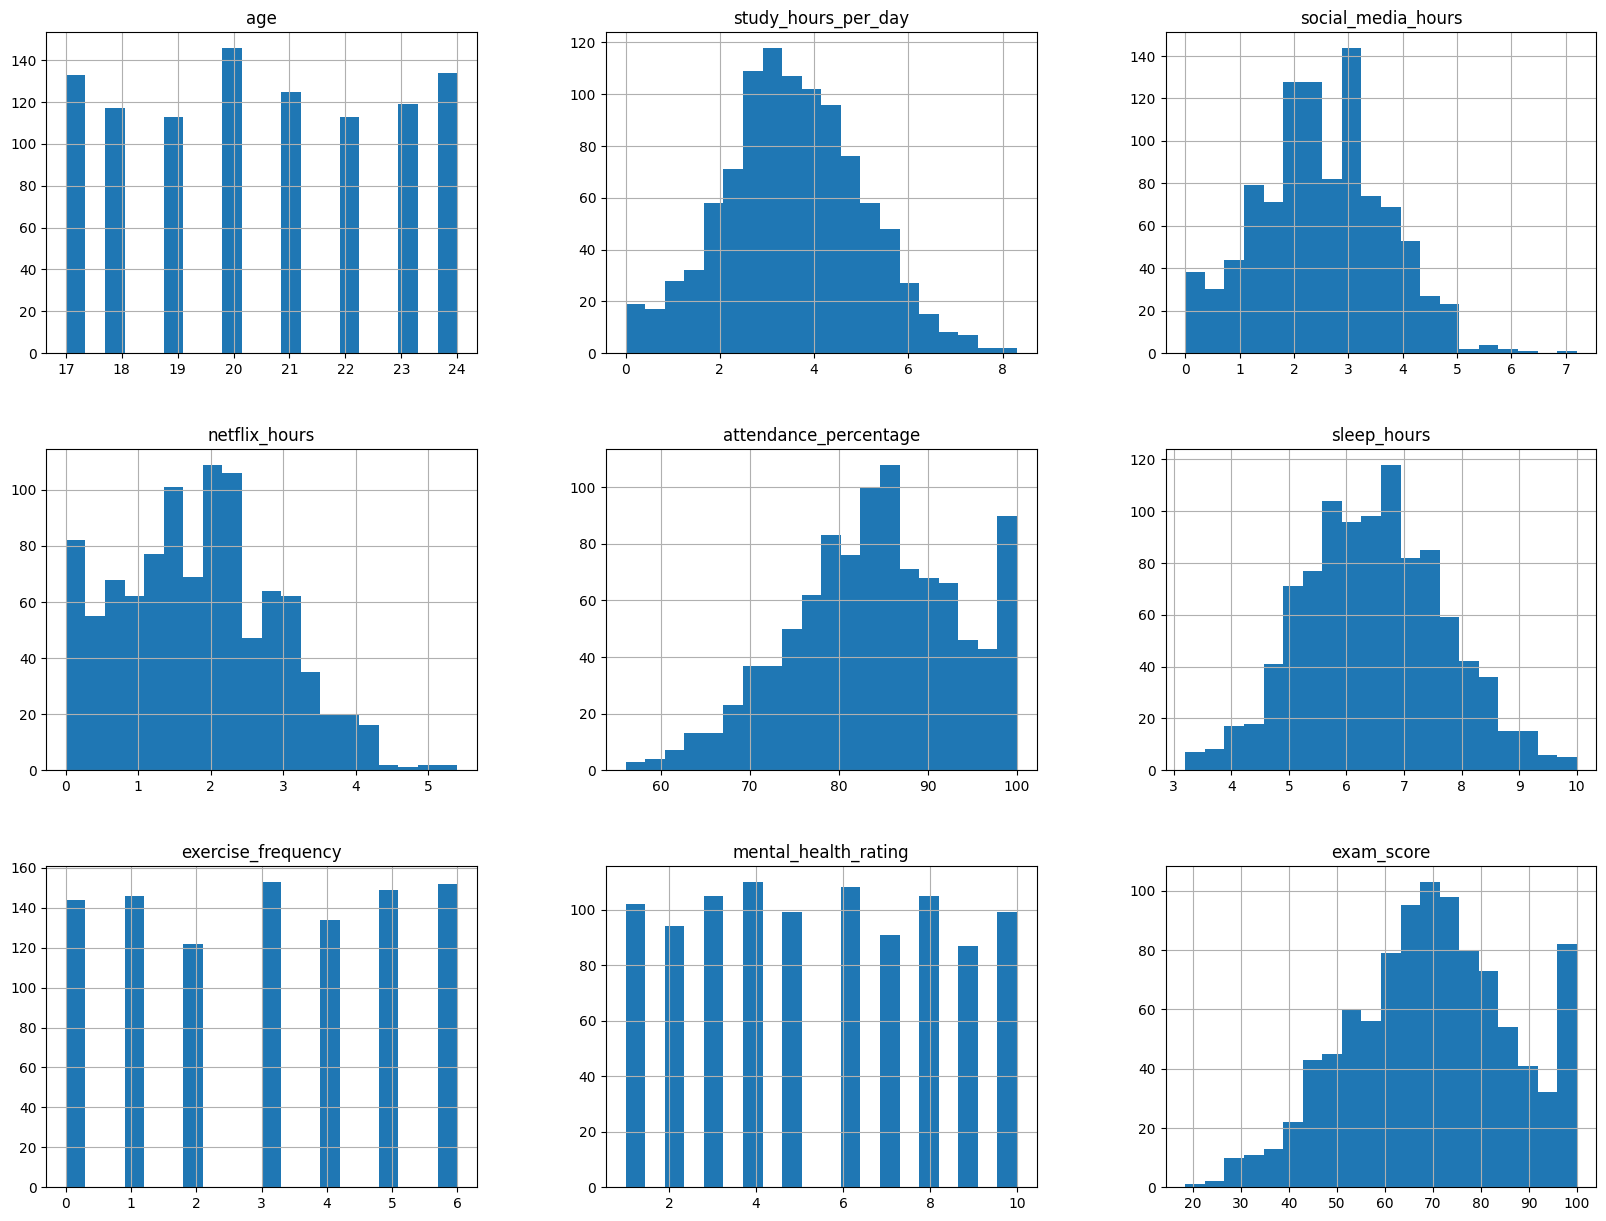

In [15]:
# Histogram semua kolom
df.hist(bins=20, figsize=(20, 15))
plt.show()

Visualisasi distribusi kolom kategorikal

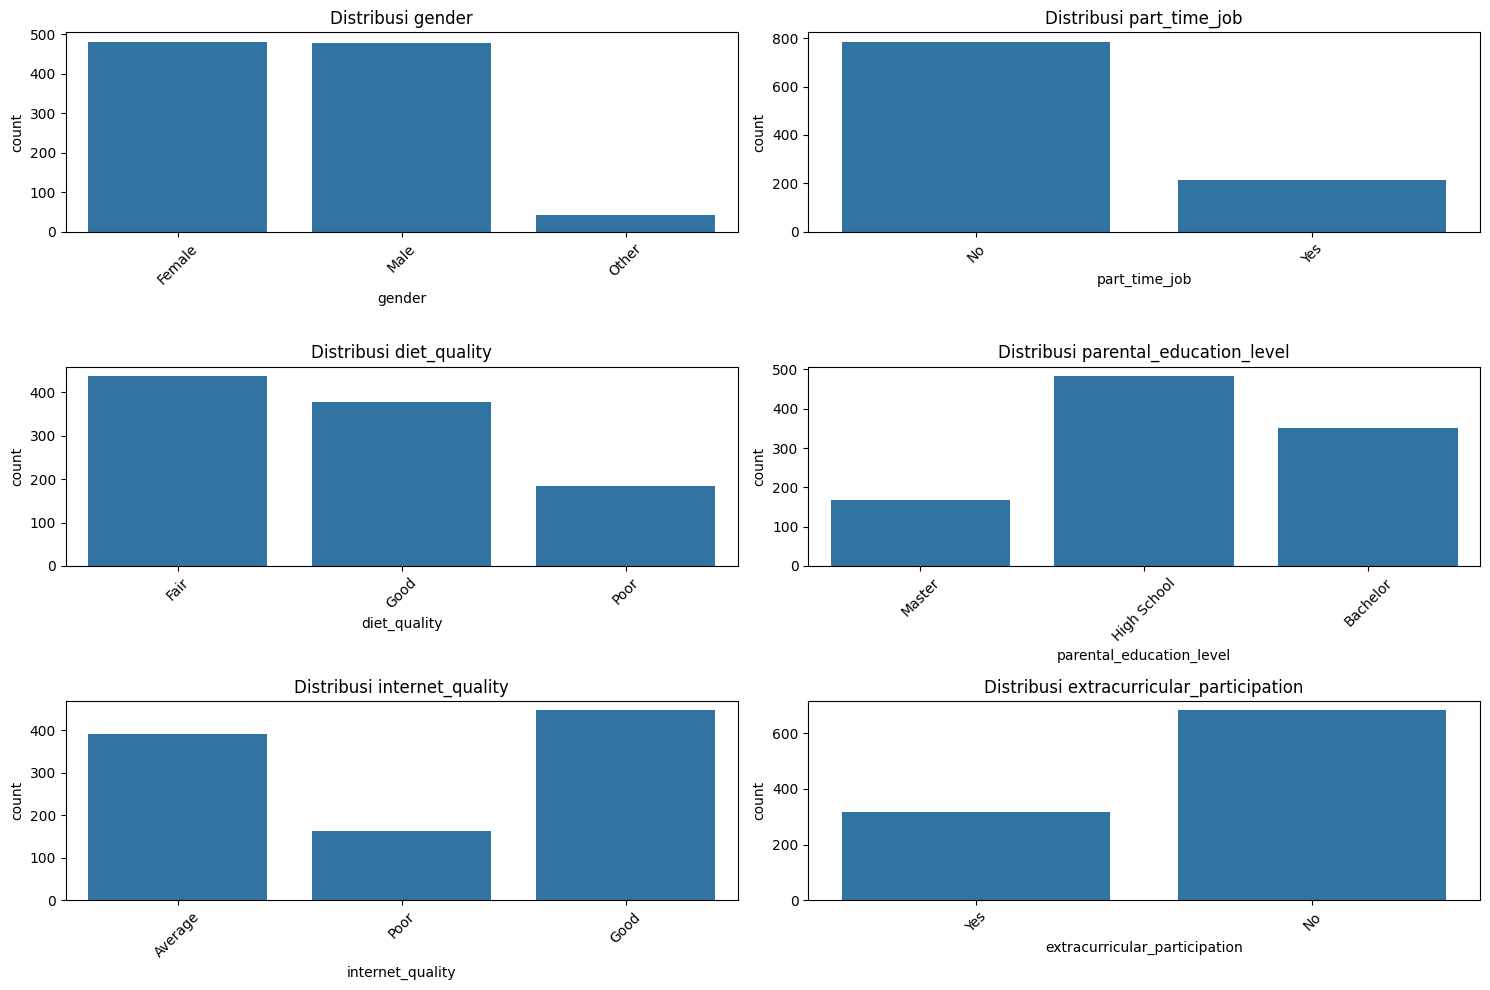

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    ax = axes[i // 2, i % 2]
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(f'Distribusi {col}')
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [17]:
print(f"Nilai minimum: {df['exam_score'].min()}")
print(f"Nilai maksimum: {df['exam_score'].max()}")
print(f"Nilai rata-rata: {df['exam_score'].mean():.2f}")
print(f"Standar deviasi: {df['exam_score'].std():.2f}")

Nilai minimum: 18.4
Nilai maksimum: 100.0
Nilai rata-rata: 69.60
Standar deviasi: 16.89


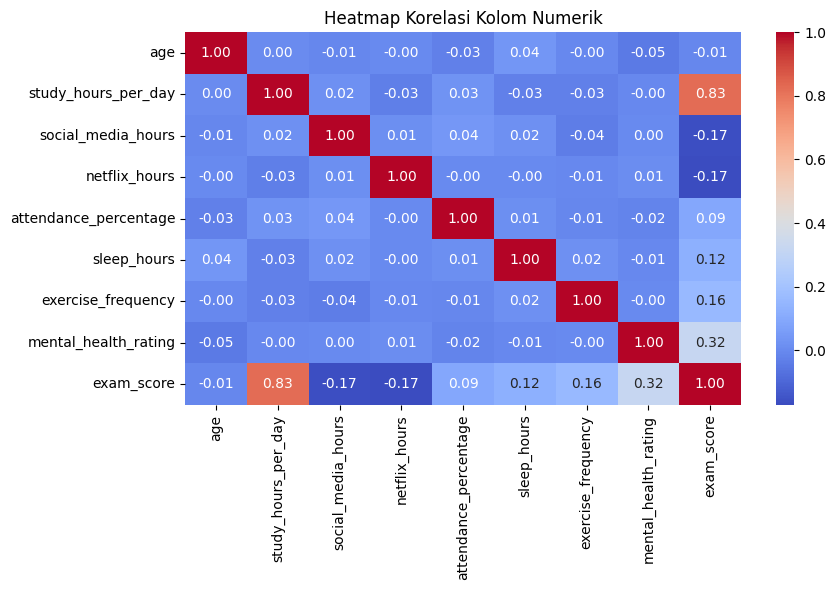

In [18]:
# Analisis Korelasi antara kolom Numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation = df[numeric_cols].corr()

plt.figure(figsize=(9, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Kolom Numerik')
plt.tight_layout()
plt.show()

Heatmap korelasi menunjukan bahwa:

- Variabel seperti `study_hours_per_day`, `sleep_hours`, `exercise_frequency`, dan `mental_health_rating` memiliki korelasi positif dengan `exam_score`
- Variabel `study_hours_per_day` sangat berpengaruh positif dengan variabel `exam_score`
- Variabel seperti `social_media_hours` dan `netflix_hours` memiliki korelasi negatif dengan `exam_score`

In [19]:
categorical_cols = ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 
                    'internet_quality', 'extracurricular_participation']

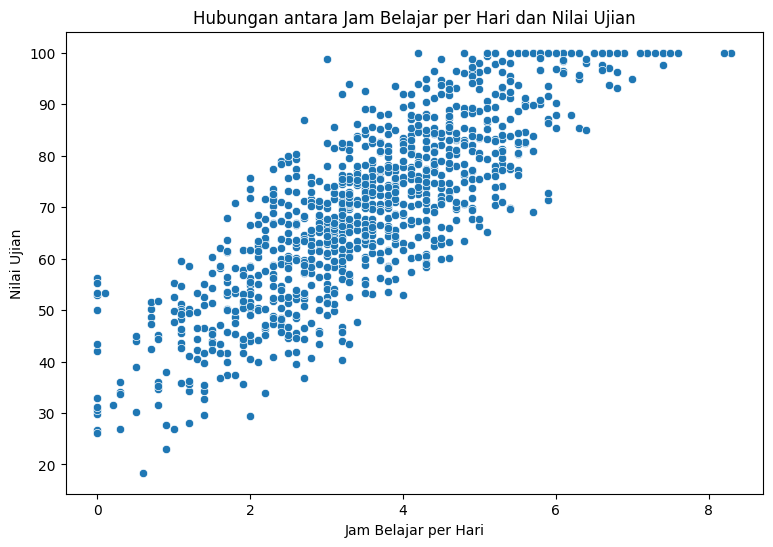

In [20]:
# Analisis Hubungan antara Jam Belajar dan Nilai Ujian karena yang sangat berpengaruh
plt.figure(figsize=(9, 6))
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=df)
plt.title('Hubungan antara Jam Belajar per Hari dan Nilai Ujian')
plt.xlabel('Jam Belajar per Hari')
plt.ylabel('Nilai Ujian')
plt.show()

Dari hasil scatterplot, dapat disimpulkan bahwa semakin banyak jam belajar per hari, semakin tinggi nilai ujian siswa

# Data Preparation

Pada tahap data preparation, tidak dilakukan penghilangan outlier dikarenakan data yang digunakan memang mewakili kasus nyata yang sangat bervariasi

In [21]:
df.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


Untuk variabel kategorikal nominal seperti `gender` dan `internet_quality` karena tidak ada hubungan ordinal (tingkatan) antar kategori, Untuk variabel `diet_quality` yang bersifat ordinal (memiliki tingkatan), kita dapat menggunakan Ordinal Encoding

In [22]:
# Encoding Variabel Kategorikal
# One-Hot Encoding untuk variabel kategorik
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [23]:
# Ordinal Encoding untuk variabel diet_quality
diet_mapping = {'Poor': 0, 'Average': 1, 'Good': 2, 'Excellent': 3}
df['diet_quality_encoded'] = df['diet_quality'].map(diet_mapping)

In [39]:
df_encoded.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,gender_Male,gender_Other,part_time_job_Yes,diet_quality_Good,diet_quality_Poor,parental_education_level_High School,parental_education_level_Master,internet_quality_Good,internet_quality_Poor,extracurricular_participation_Yes
0,1.084551,-2.418068,-1.114064,-0.669750,0.092426,1.248120,1.461166,0.900186,56.2,False,False,False,False,False,False,True,False,False,True
1,-0.215870,2.281707,0.251315,0.446965,1.401696,-1.525661,1.461166,0.900186,100.0,False,False,False,True,False,True,False,False,False,False
2,0.217604,-1.464491,0.507324,-0.483631,1.135584,1.248120,-1.008689,-1.559339,34.3,True,False,False,False,True,True,False,False,True,False
3,1.084551,-1.736942,1.190013,-0.762810,-1.397800,2.227102,0.473224,-1.559339,26.8,False,False,False,False,True,False,True,True,False,True
4,-0.649344,0.987566,1.616694,-1.228108,0.720450,-1.280916,-0.020747,-1.559339,66.4,False,False,False,False,False,False,True,True,False,False


In [25]:
# Feature Scaling
# Normalisasi fitur numerik
from sklearn.preprocessing import StandardScaler

numeric_features = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
                     'attendance_percentage', 'sleep_hours', 'exercise_frequency', 
                     'mental_health_rating']

scaler = StandardScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

In [40]:
df_encoded.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,gender_Male,gender_Other,part_time_job_Yes,diet_quality_Good,diet_quality_Poor,parental_education_level_High School,parental_education_level_Master,internet_quality_Good,internet_quality_Poor,extracurricular_participation_Yes
0,1.084551,-2.418068,-1.114064,-0.669750,0.092426,1.248120,1.461166,0.900186,56.2,False,False,False,False,False,False,True,False,False,True
1,-0.215870,2.281707,0.251315,0.446965,1.401696,-1.525661,1.461166,0.900186,100.0,False,False,False,True,False,True,False,False,False,False
2,0.217604,-1.464491,0.507324,-0.483631,1.135584,1.248120,-1.008689,-1.559339,34.3,True,False,False,False,True,True,False,False,True,False
3,1.084551,-1.736942,1.190013,-0.762810,-1.397800,2.227102,0.473224,-1.559339,26.8,False,False,False,False,True,False,True,True,False,True
4,-0.649344,0.987566,1.616694,-1.228108,0.720450,-1.280916,-0.020747,-1.559339,66.4,False,False,False,False,False,False,True,True,False,False


Hanya memilih fitur-fitur yang berpengaruh untuk meningkatkan performa model dan menghindari overfitting.

In [27]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression

X = df_encoded.drop('exam_score', axis=1)
y = df_encoded['exam_score']

# Memilih fitur terbaik
selector = SelectKBest(f_regression, k=10)
X_selected = selector.fit_transform(X, y)

# Mendapatkan nama fitur terpilih
selected_features_idx = selector.get_support(indices=True)
selected_features = X.columns[selected_features_idx]
print("Fitur terpilih:", selected_features)

Fitur terpilih: Index(['study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating', 'diet_quality_Poor',
       'parental_education_level_Master', 'internet_quality_Good'],
      dtype='object')


Membagi data dengan rasio 80:20, 80% untuk training dan 20% untuk testing.

In [29]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

print(f"Jumlah sampel training: {X_train.shape[0]}")
print(f"Jumlah sampel testing: {X_test.shape[0]}")

Jumlah sampel training: 800
Jumlah sampel testing: 200


# Modelling

**Linear Regression**

In [30]:
# Linear Regression
from sklearn.linear_model import LinearRegression

# Membuat dan melatih model Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

**Random Forest Regressor**

In [31]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Membuat dan melatih model Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

**Gradient Boosting Regressor**

In [32]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

# Membuat dan melatih model Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

# Evaluation

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
# Prediksi pada data testing
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

Metrik evaluasi yang digunakan adalah $MAE$, $MSE$, $RMSE$, dan $R^2$

In [35]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)


Perbandingan Model:
                        MAE        MSE      RMSE        R²
Model                                                     
Linear Regression  4.101150  25.700892  5.069605  0.899774
Gradient Boosting  4.658135  30.909028  5.559589  0.879464
Random Forest      4.850395  37.151703  6.095220  0.855119


<Figure size 1200x800 with 0 Axes>

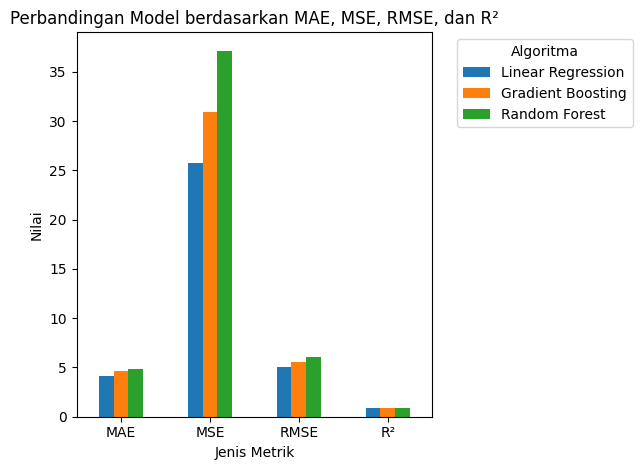

In [36]:
# 4 Plot Perbandingan MAE, MSE, RMSE, dan R2 tiap Model
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'MAE': [mae_lr, mae_rf, mae_gb],
    'MSE': [mse_lr, mse_rf, mse_gb],
    'RMSE': [rmse_lr, rmse_rf, rmse_gb],
    'R²': [r2_lr, r2_rf, r2_gb]
})
results.set_index('Model', inplace=True)
results.sort_values(by='RMSE', ascending=True, inplace=True)
print("\nPerbandingan Model:")
print(results)

results_transposed = results.T  # Transpose dataframe untuk menukar baris dan kolom

plt.figure(figsize=(12, 8))
results_transposed.plot(kind='bar')
plt.title('Perbandingan Model berdasarkan MAE, MSE, RMSE, dan R²')
plt.xlabel('Jenis Metrik')
plt.ylabel('Nilai')
plt.xticks(rotation=0)  # Rotasi x-axis labels ke horizontal
plt.legend(title='Algoritma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Berdasarkan plot perbandingan model, urutan algoritma dari yang terbaik adalah **Linear Regression**, **Gradient Boosting Regressor**, dan **Random Forest Regressor**.

In [ ]:
# # Mencoba prediksi nilai ujian untuk siswa baru
new_student = [-2.41806844, -1.11406369, -0.66975012,  0.09242597,  1.24812012,  1.46116644,  0.90018637,  0,          1,          0       ] # Contoh data siswa baru

new_student = np.array(new_student).reshape(1, -1)  # Ubah bentuk menjadi 2D array

predicted_score = lr_model.predict(new_student)
print(f"Prediksi nilai ujian untuk siswa baru: {predicted_score[0]:.2f}")

Prediksi nilai ujian untuk siswa baru: 52.77
